.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

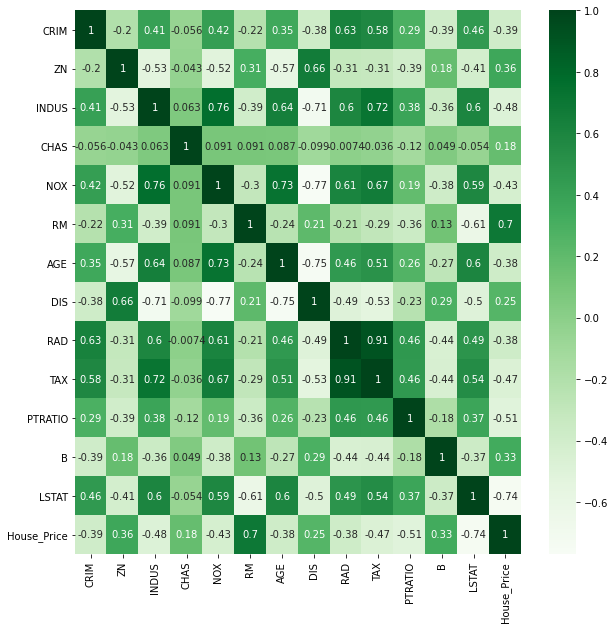

(379, 13)
(127, 13)
(379,)
(127, 13)


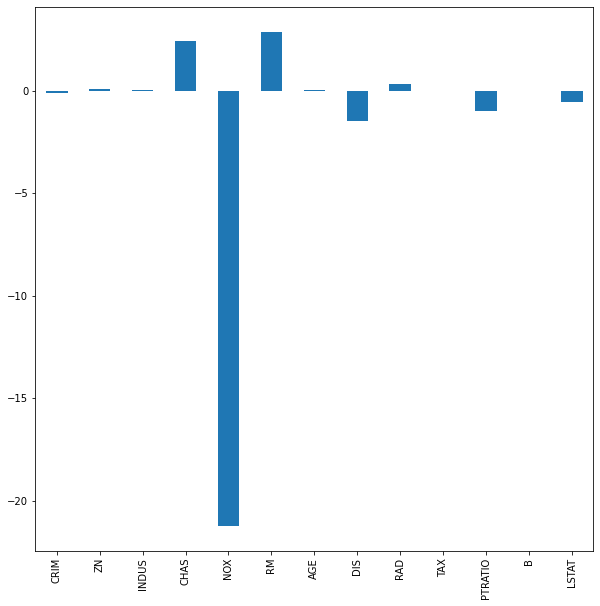

(127, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price,Predicted,Prediction_Error
366,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00,21.9,16.8,5.1
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03,14.6,19.4,4.8
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8,36.7,8.1
324,0.34109,0.0,7.38,0.0,0.493,6.415,40.1,4.7211,5.0,287.0,19.6,396.90,6.12,25.0,24.8,0.2
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2,21.5,0.3
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3,19.2,0.9
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81,7.2,8.3,1.1
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46,18.5,14.2,4.3
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52,11.0,14.9,3.9
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9,28.0,4.1


In [52]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
boston = datasets.load_boston()
print(boston.DESCR)
boston.keys()
boston.data.shape
boston.target
boston.data.ndim
boston.feature_names
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.sample(5)

boston_df['House_Price'] = boston.target
boston_df.head()

x=boston_df.corr()
x

plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap='Greens',annot=True)
plt.show()

x = boston_df.drop('House_Price', axis=1)
y= boston_df['House_Price']

x.head()
y.head()

train_x , test_x, train_y, test_y = train_test_split(x,y,test_size=0.25,random_state=1)


print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_x.shape)
from sklearn.linear_model import  LinearRegression
lm= LinearRegression()
lm

lm.fit(train_x,train_y)

predict_test=lm.predict(test_x)

predict_test

from sklearn.metrics import mean_absolute_error
np.round(mean_absolute_error(test_y,predict_test),2)


coeff_df = pd.DataFrame({'features':x.columns,'coeff':lm.coef_})
coeff_df = coeff_df.sort_values(by=['coeff'])
coeff_df


plt.figure(figsize=(10,10))
ft_importances = pd.Series(lm.coef_, index=x.columns)
ft_importances.plot(kind='bar')

plt.show()


fdf=pd.concat([test_x,test_y],1)

print(test_x.shape)

fdf['Predicted']=np.round(predict_test,1)
fdf['Prediction_Error']= np.abs(fdf['House_Price'] -fdf['Predicted'])
fdf.sample(10)



